## Library

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set(color_codes=True,style="whitegrid")

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df_am_losses = pd.read_csv('dataset/Automobile/automobile-losses.csv')
df_am_risk = pd.read_csv('dataset/Automobile/automobile-risk.csv')
df_am_spec = pd.read_csv('dataset/Automobile/automobile-spec.csv')

df = pd.merge(df_am_spec,df_am_risk,how='outer',on='ID')
df = pd.merge(df,df_am_losses,how='outer',on='ID')
df.set_index('ID')
df.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [27]:
df.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
normalized-losses    41
dtype: int64

## Missing Value

Beberapa kolom yang perlu diisikan missing value dengan pendekatan median dan mode.

In [29]:
df['num-of-doors'].fillna(value=df['num-of-doors'].value_counts().index[0],inplace =True)
df['bore'].fillna(value=df['bore'].median(),inplace =True)
df['stroke'].fillna(value=df['stroke'].median(),inplace =True)
df['horsepower'].fillna(value=df['horsepower'].median(),inplace =True)
df['peak-rpm'].fillna(value=df['peak-rpm'].median(),inplace =True)
df['price'].fillna(value=df['price'].median(),inplace =True)
df['normalized-losses'].fillna(value=df['normalized-losses'].median(),inplace =True)

In [30]:
df.corr()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.261161,-0.162483,0.150276,-0.014415,-0.202780,0.015940,0.011255,-0.110874,-0.151621,-0.221681
wheel-base,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847,-0.531954,-0.073709
length,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567,-0.357612,-0.006837
width,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558,-0.232919,0.058378
height,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439,-0.541038,-0.365674
curb-weight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817,-0.227691,0.064343
engine-size,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343,-0.105790,0.072536
bore,0.261161,0.489556,0.607016,0.559262,0.173506,0.648848,0.585636,1.000000,-0.056054,0.005468,0.574258,-0.256600,-0.582627,-0.585352,0.532861,-0.132563,-0.050428
stroke,-0.162483,0.159684,0.128622,0.182708,-0.058994,0.168164,0.200246,-0.056054,1.000000,0.185679,0.083804,-0.059716,-0.044973,-0.046389,0.083627,-0.004928,0.046739
compression-ratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005468,0.185679,1.000000,-0.204851,-0.436441,0.324701,0.265201,0.072890,-0.178515,-0.114772


In [31]:
df_dummies = pd.get_dummies(df,drop_first=True)

mencari volume dengan mengkalikan panjang, lebar, dan tinggi.

In [34]:
df2 = df[['price']]
arr = []

for x in range(len(df)):
    y = df['length'][x]*df['width'][x]*df['height'][x]
    arr.append(y)

df2['volume']=arr

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


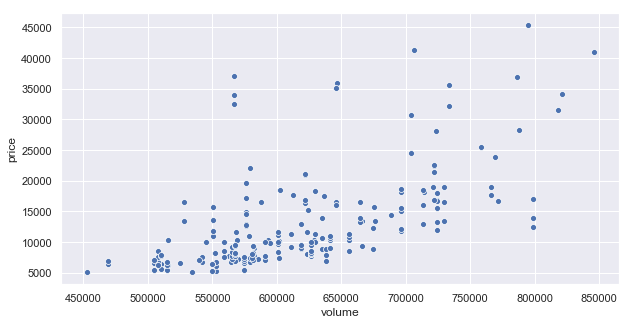

In [35]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="volume", y="price", data=df2)

## Modelling

In [36]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## 1. K-Means

### 1.1 Elbow method

Untuk menentukan optimal 'k' yang digunakan, maka kita dapat melihat visualisasi 'elbow methodnya' dengan kemiringan titik yang signifikan.

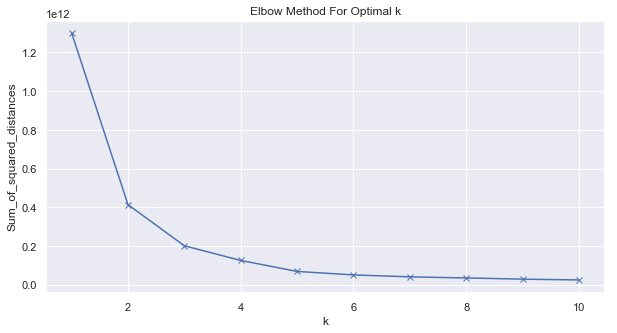

In [37]:
plt.figure(figsize=(10,5))

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
df2

,price,volume
0,13495.0,528019.904
1,16500.0,528019.904
2,16500.0,587592.640
3,13950.0,634816.956
4,17450.0,636734.832
...,...,...
200,16845.0,721961.760
201,19045.0,720913.920
202,21485.0,721961.760
203,22470.0,721961.760


In [40]:
df3 = df2.copy()

In [41]:
df3['kluster'] = kmeans.labels_

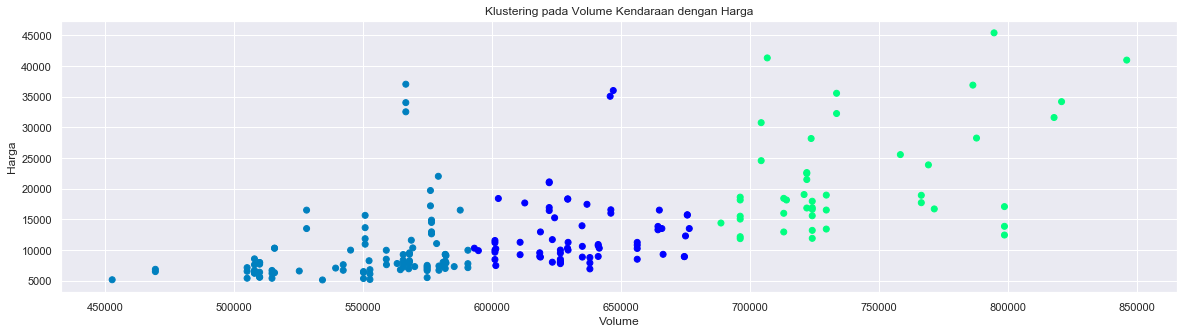

In [42]:
plt.figure(figsize=(20,5))

plt.scatter(df3['volume'],df3['price'], c=df3['kluster'],cmap=plt.cm.winter)
plt.xlabel("Volume")
plt.ylabel("Harga")
plt.title("Klustering pada Volume Kendaraan dengan Harga")
plt.show()

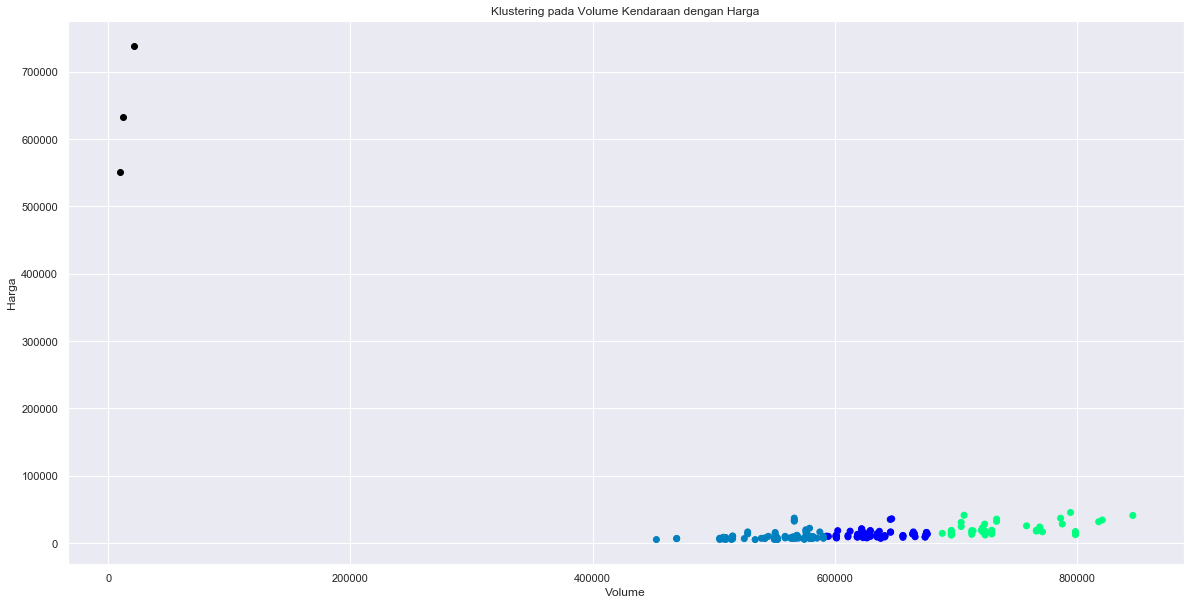

In [92]:
plt.figure(figsize=(20,10))

plt.scatter(df3['volume'],df3['price'], c=df3['kluster'],cmap=plt.cm.winter)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Volume")
plt.ylabel("Harga")
plt.title("Klustering pada Volume Kendaraan dengan Harga")
plt.show()

Ini masih menjadi kendala dalam penentuan paramater. Terlihat bahwasanya titik centroid jauh dari hasil clusteringnya.

### 1.2 Dendogram

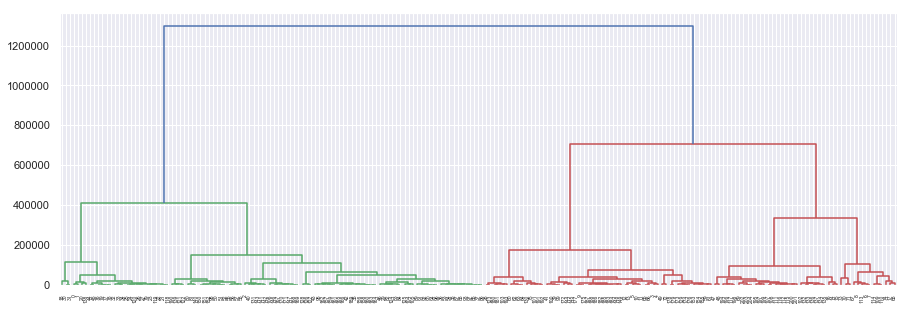

In [94]:
plt.figure(figsize=(15,5))

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df2, method='ward'))

Terlihat bahwasanya ada jarak yang cukup lebar pada 400000-600000 pada harga. Sehingga dapat di interpretasi bahwa k=3 merupakan nilai yang optimal.

### 1.3 DBSCAN

In [88]:
dbscan = DBSCAN(eps=12000, min_samples=2)
dbscan.fit(df3)

DBSCAN(algorithm='auto', eps=12000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [89]:
print(dbscan.labels_)

[ 0  0  0  0  0  0  1  1  1  0  0  0  0  0  2  2  2  3 -1  0  0  0  0  0
  0  0  0  0  0  0  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  2  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  2  6  6
  5 -1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  0  0  0  0  2  2  7  7  2  2  1  7  2  2  2  0  0
  0  0  0  0  0  0  8  8  8  0  0  0  2  2  2  2  2  2  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  2  2  2  2  2  2  2  2  2  2  2]


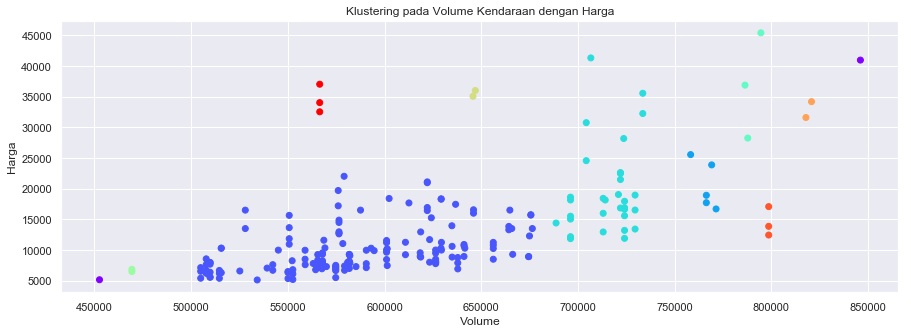

In [90]:
plt.figure(figsize=(15,5))

plt.scatter(df3['volume'],df3['price'], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Volume")
plt.ylabel("Harga")
plt.title("Klustering pada Volume Kendaraan dengan Harga")
plt.show()

Dari print label yang dihasilkan, terlihat bahwasanya ada 7 kluster yang berbeda. Ada kluster yang memiliki volume besar dan harga tinggi berisikan satu data saja. Penyebaran yang dihasilkan juga cukup merata.